In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df1 = pd.read_csv('1.gt_bitcoin.csv', usecols=[2], skiprows=2, names=['1.gt_bitcoin'])
df2 = pd.read_csv('2.gt_Buy_Bitcoin.csv', usecols=[2], skiprows=2, names=['2.gt_Buy_Bitcoin'])
df3 = pd.read_csv('3.gt_Sell_Bitcoin.csv', usecols=[2], skiprows=2, names=['3.gt_Sell_Bitcoin'])
df4 = pd.read_csv('4.gt_ethereum.csv', usecols=[2], skiprows=2, names=['4.gt_ethereum'])
df5 = pd.read_csv('5.gt_Ukraine_war.csv', usecols=[2], skiprows=2, names=['5.gt_Ukraine_war'])
df6 = pd.read_csv('6.gt_covid.csv', usecols=[2], skiprows=2, names=['6.gt_covid'])
df8 = pd.read_csv('8.CBDC_uncertainty.csv', usecols=[2], skiprows=2, names=['8.CBDC_uncertainty'])
df9 = pd.read_csv('9.CBDC_atten.csv', usecols=[2], skiprows=2, names=['9.CBDC_atten'])
df10 = pd.read_csv('10.news_senti.csv', usecols=[2], skiprows=2, names=['10.news_senti'])
df11 = pd.read_csv('11.fear&greed.csv', usecols=[2], skiprows=2, names=['11.fear&greed'])
df12 = pd.read_csv('12.tweets_pos.csv', usecols=[2], skiprows=2, names=['12.tweets_pos'])
df13 = pd.read_csv('13.tweets_neg.csv', usecols=[2], skiprows=2, names=['13.tweets_neg'])
df14 = pd.read_csv('14.twitter_btccrash_pos.csv', usecols=[2], skiprows=2, names=['14.twitter_btccrash_pos'])
df15 = pd.read_csv('15.twitter_btccrash_neg.csv', usecols=[2], skiprows=2, names=['15.twitter_btccrash_neg'])

In [10]:
df_concat = pd.concat([df1, df2, df3, df4, df5, df6, df8, df9, df10, df11, df12, df13, df14, df15], axis=1)
df_remove = df_concat.drop(['2.gt_Buy_Bitcoin', '3.gt_Sell_Bitcoin', '8.CBDC_uncertainty'], axis=1)
# replace "inf" with NaN
df_remove = df_remove.replace('inf', 0)
df_remove = df_remove.replace([np.inf, -np.inf], 0)
df_na = df_remove.fillna(0)
df_na

,1.gt_bitcoin,4.gt_ethereum,5.gt_Ukraine_war,6.gt_covid,9.CBDC_atten,10.news_senti,11.fear&greed,12.tweets_pos,13.tweets_neg,14.twitter_btccrash_pos,15.twitter_btccrash_neg
0,-0.004854,-0.011494,0.000000,0.0,0.000321,-0.095687,0.236842,-0.113559,0.514869,-0.138386,0.120306
1,-0.004878,-0.011628,0.000000,0.0,-0.000248,-0.097991,0.191489,0.036830,-0.234322,-0.265998,0.381993
2,-0.004902,-0.011765,0.000000,0.0,-0.000248,-0.078837,-0.214286,0.063410,0.100377,0.194764,-0.005493
3,0.019704,-0.011905,0.000000,0.0,-0.000248,-0.079216,0.250000,-0.097288,-0.182443,-0.223062,-0.145083
4,0.019324,-0.012048,0.000000,0.0,-0.000248,-0.051206,0.072727,-0.214515,0.211336,0.090925,0.367505
...,...,...,...,...,...,...,...,...,...,...,...
1760,-0.015873,0.142857,-0.011905,0.0,-0.000637,-0.202782,-0.034483,-0.192200,0.144226,-0.319385,-0.168254
1761,-0.016129,0.125000,-0.012048,0.0,-0.000638,-0.011448,-0.035714,0.172758,0.098971,-0.287368,0.329540
1762,-0.016393,0.111111,-0.012195,0.0,-0.000638,-0.103914,0.037037,-0.127630,0.026982,-0.067539,0.101123
1763,-0.016667,0.100000,-0.012346,0.0,-0.000639,-0.064228,0.000000,0.165572,-0.055837,0.233303,-0.110677


In [11]:
bitcoin = pd.read_csv('bitcoin.csv', usecols=[5], skiprows=2, names=['bitcoin'])
ether = pd.read_csv('ethereum.csv', usecols=[5], skiprows=2, names=['ether'])
BDM_exlarge = pd.read_csv('SP_BDM_exlarge.csv', usecols=[5], skiprows=2, names=['BDM_exlarge'])
BDM = pd.read_csv('SP_BDM.csv', usecols=[5], skiprows=2, names=['BDM'])

# control
VIX = pd.read_csv('VIX.csv', usecols=[2], skiprows=2, names=['VIX'])
df_control = pd.concat([df_na,VIX], axis=1)

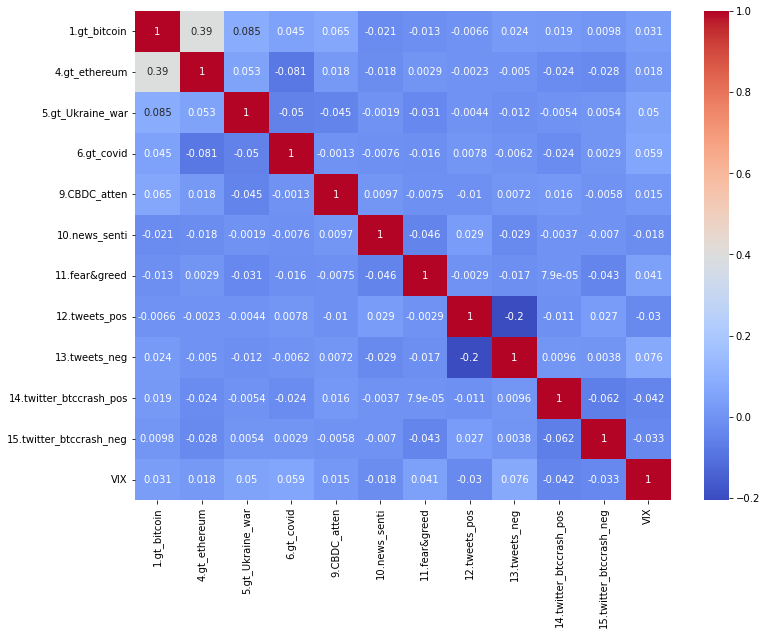

In [12]:
# compute correlation matrix
corr_matrix = df_control.corr()

# Plot the correlation matrix as a heatmap
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, ax=ax)

# show the plot
plt.show()

# 1. Bitcoin

In [20]:
bitcoin_control = pd.concat([bitcoin,df_control], axis=1)
train, test = train_test_split(bitcoin_control, test_size = 0.3)
x_train = train.iloc[0:,1:13]
y_train = train.iloc[0:,0]
x_test = test.iloc[0:,1:13]
y_test = test.iloc[0:,0]

# add intercept term to independent variables
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)
# fit logistic regression model on training set
logit_model = sm.Logit(y_train, x_train)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.673174
         Iterations 6


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                bitcoin   No. Observations:                 1235
Model:                          Logit   Df Residuals:                     1222
Method:                           MLE   Df Model:                           12
Date:                Sat, 18 Mar 2023   Pseudo R-squ.:                 0.02732
Time:                        17:31:59   Log-Likelihood:                -831.37
converged:                       True   LL-Null:                       -854.72
Covariance Type:            nonrobust   LLR p-value:                 5.251e-06
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1380      0.061      2.278      0.023       0.019       0.257
1.gt_bitcoin                1.3650      1.951      0.699      0.484      -2.460       5.190
4.gt_ethereum              -0.3028      1.180     -0.257      0.797      -2.615       2.009
5.gt_Ukraine_war           -0.0965      0.564     -0.171      0.864      -1.202       1.009
6.gt_covid                 -0.2004      1.300     -0.154      0.877      -2.748       2.347
9.CBDC_atten              108.8976     76.121      1.431      0.153     -40.297     258.092
10.news_senti               0.0382      0.044      0.858      0.391      -0.049       0.125
11.fear&greed              -0.1400      0.229     -0.612      0.541      -0.588       0.308
12.tweets_pos               0.0357      0.415      0.086      0.931      -0.778       0.850
13.tweets_neg              -1.0740      0.263     -4.080      0.000      -1.590      -0.558
14.twitter_btccrash_pos    -0.0290      0.027     -1.091      0.275      -0.081       0.023
15.twitter_btccrash_neg     0.0376      0.074      0.509      0.610      -0.107       0.182
VIX                        -4.5672      1.036     -4.408      0.000      -6.598      -2.537
===========================================================================================
"""

# 2. Ether

In [21]:
ether_control = pd.concat([ether,df_control], axis=1)
train, test = train_test_split(ether_control, test_size = 0.3)
x_train = train.iloc[0:,1:13]
y_train = train.iloc[0:,0]
x_test = test.iloc[0:,1:13]
y_test = test.iloc[0:,0]

# add intercept term to independent variables
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)
# fit logistic regression model on training set
logit_model = sm.Logit(y_train, x_train)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.668199
         Iterations 9


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  ether   No. Observations:                 1235
Model:                          Logit   Df Residuals:                     1222
Method:                           MLE   Df Model:                           12
Date:                Sat, 18 Mar 2023   Pseudo R-squ.:                 0.03461
Time:                        17:32:08   Log-Likelihood:                -825.23
converged:                       True   LL-Null:                       -854.81
Covariance Type:            nonrobust   LLR p-value:                 3.194e-08
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1218      0.061      1.997      0.046       0.002       0.241
1.gt_bitcoin               -2.7455      1.818     -1.510      0.131      -6.308       0.817
4.gt_ethereum               3.4840      1.185      2.939      0.003       1.161       5.807
5.gt_Ukraine_war            0.9644      0.593      1.627      0.104      -0.197       2.126
6.gt_covid                  0.4757      1.309      0.363      0.716      -2.090       3.042
9.CBDC_atten              126.8261     72.931      1.739      0.082     -16.117     269.769
10.news_senti              -0.0029      0.007     -0.407      0.684      -0.017       0.011
11.fear&greed               0.1017      0.216      0.472      0.637      -0.321       0.524
12.tweets_pos               0.2039      0.436      0.467      0.640      -0.651       1.059
13.tweets_neg              -0.8832      0.253     -3.484      0.000      -1.380      -0.386
14.twitter_btccrash_pos    -0.0084      0.025     -0.341      0.733      -0.056       0.040
15.twitter_btccrash_neg    -0.0049      0.068     -0.072      0.942      -0.139       0.129
VIX                        -4.9580      1.016     -4.879      0.000      -6.950      -2.966
===========================================================================================
"""

# 3. BDM_exlarge

In [22]:
BDM_exlarge_control = pd.concat([BDM_exlarge,df_control], axis=1)
train, test = train_test_split(BDM_exlarge_control, test_size = 0.3)
x_train = train.iloc[0:,1:13]
y_train = train.iloc[0:,0]
x_test = test.iloc[0:,1:13]
y_test = test.iloc[0:,0]

# add intercept term to independent variables
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)
# fit logistic regression model on training set
logit_model = sm.Logit(y_train, x_train)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.659148
         Iterations 10


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            BDM_exlarge   No. Observations:                 1235
Model:                          Logit   Df Residuals:                     1222
Method:                           MLE   Df Model:                           12
Date:                Sat, 18 Mar 2023   Pseudo R-squ.:                 0.04769
Time:                        17:32:35   Log-Likelihood:                -814.05
converged:                       True   LL-Null:                       -854.81
Covariance Type:            nonrobust   LLR p-value:                 2.109e-12
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1194      0.062      1.940      0.052      -0.001       0.240
1.gt_bitcoin               -4.2329      1.975     -2.143      0.032      -8.105      -0.361
4.gt_ethereum               1.4829      1.187      1.250      0.211      -0.843       3.809
5.gt_Ukraine_war            0.2721      0.579      0.470      0.639      -0.863       1.407
6.gt_covid                 -1.2484      2.112     -0.591      0.554      -5.388       2.891
9.CBDC_atten               84.8597     80.024      1.060      0.289     -71.984     241.704
10.news_senti              -0.1066      0.079     -1.356      0.175      -0.261       0.047
11.fear&greed               0.8747      0.297      2.944      0.003       0.292       1.457
12.tweets_pos               0.0066      0.427      0.015      0.988      -0.830       0.843
13.tweets_neg              -0.5866      0.241     -2.436      0.015      -1.059      -0.115
14.twitter_btccrash_pos    -0.0096      0.025     -0.380      0.704      -0.059       0.040
15.twitter_btccrash_neg    -0.0358      0.081     -0.440      0.660      -0.195       0.123
VIX                        -7.5147      1.143     -6.573      0.000      -9.756      -5.274
===========================================================================================
"""

# 4. BDM

In [23]:
BDM_control = pd.concat([BDM,df_control], axis=1)
train, test = train_test_split(BDM_control, test_size = 0.3)
x_train = train.iloc[0:,1:13]
y_train = train.iloc[0:,0]
x_test = test.iloc[0:,1:13]
y_test = test.iloc[0:,0]

# add intercept term to independent variables
x_train = sm.add_constant(x_train)
x_test = sm.add_constant(x_test)
# fit logistic regression model on training set
logit_model = sm.Logit(y_train, x_train)
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.658368
         Iterations 11


/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    BDM   No. Observations:                 1235
Model:                          Logit   Df Residuals:                     1222
Method:                           MLE   Df Model:                           12
Date:                Sat, 18 Mar 2023   Pseudo R-squ.:                 0.04736
Time:                        17:33:11   Log-Likelihood:                -813.08
converged:                       True   LL-Null:                       -853.51
Covariance Type:            nonrobust   LLR p-value:                 2.845e-12
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1389      0.061      2.263      0.024       0.019       0.259
1.gt_bitcoin                0.1941      1.909      0.102      0.919      -3.548       3.936
4.gt_ethereum               3.0479      1.188      2.566      0.010       0.720       5.376
5.gt_Ukraine_war           -0.6613      0.667     -0.991      0.322      -1.969       0.647
6.gt_covid                 -1.8052      1.950     -0.926      0.355      -5.627       2.017
9.CBDC_atten              -16.4137     75.241     -0.218      0.827    -163.884     131.056
10.news_senti              -0.0319      0.050     -0.636      0.525      -0.130       0.066
11.fear&greed               0.7282      0.261      2.791      0.005       0.217       1.239
12.tweets_pos              -0.7553      0.429     -1.759      0.079      -1.597       0.086
13.tweets_neg              -0.7292      0.253     -2.881      0.004      -1.225      -0.233
14.twitter_btccrash_pos     0.0091      0.029      0.316      0.752      -0.047       0.065
15.twitter_btccrash_neg     0.1016      0.093      1.095      0.273      -0.080       0.283
VIX                        -7.0555      1.117     -6.319      0.000      -9.244      -4.867
===========================================================================================
"""